# Wyjaśnialne uczenie maszynowe, praca domowa nr 2
### Piotr Krzywicki, 394 395

Add your second homework to this folder.

Deadline 2021-03-26 EOD

Task: For a selected data set (you can use data from your project or data from Homework 1) prepare a knitr/jupiter notebook with the following points. Submit your results on GitHub to the directory Homeworks/H2.

TODO:

* For the selected data set, train at least one tree-based ensemble model (random forest, gbm, catboost or any other boosting)
* for some selected observations (two or three) from this dataset, calculate predictions for model (1)
* for observations selected in (2), calculate the decomposition of model prediction using SHAP, Break Down or both (packages for R: DALEX, iml, packages for python: shap, dalex).
* find two observations in the data set, such that they have different most important variables (e.g. age and gender are the most important for observation A, but race and class for observation B)
* (if possible) select one variable and find two observations in the data set such that for one observation this variable has a positive effect and for the other a negative effect
* train a second model (of any class, neural nets, linear, other boosting) and find an observation for which BD/shap attributions are different between the models
* Comment on the results for points (4), (5) and (6)

### Wczytanie danych, usunięcie kolumn jednoznacznie identyfikujących wiersze, podział na zbiory: treningowy i testowy

In [1]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split

df = pd.read_csv('kc_house_data.csv')

del df['id']
del df['date']
del df['zipcode']
del df['lat']
del df['long']

X = df.values

random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X[:, 1:], X[:, 0], test_size=0.2)

### Budowa lasu losowego, trening, obliczenie błędu na zbiorze testowym 

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

random.seed(42)
regr = RandomForestRegressor(random_state=42).fit(X_train, y_train)
mean_absolute_error(y_test, regr.predict(X_test))

113314.15135271473

### Wybór próbek, które jednocześnie są przykładami do podpunktów: 2, 3, 4, 5, 6, 7
To znaczy, że próbki $obs$ oraz $obs\_$ spełniają następujące warunki:
* względem predykcji za pomocą lasu losowego najważniejszą cechą wpływającą na wynik $obs$ jest rok zbudowania i średnia wielkość mieszkań w okolicy (sqft_living15), natomiast dla $obs\_$ jest to metraż oraz ranga jakości (grade)
* Stan mieszkania (condition) wpływa pozytywnie na cenę dla $obs$, negatywnie na cenę dla $obs\_$
* Dla $obs$ atrybucje cech dla predykcji modeli lasu losowego oraz regresji liniowej są istotnie inne

In [3]:
obs, obs_ = X_test[0], X_test[7]
pred, pred_ = regr.predict([obs]), regr.predict([obs_])
pred, pred_

(array([573625.56]), array([847561.91]))

### Atrybucja cech  dla wybranych powyżej próbek i modelu lasu losowego
Używamy wartości shapley'a jako atrybucji cechy, za pomocą pakietu shap

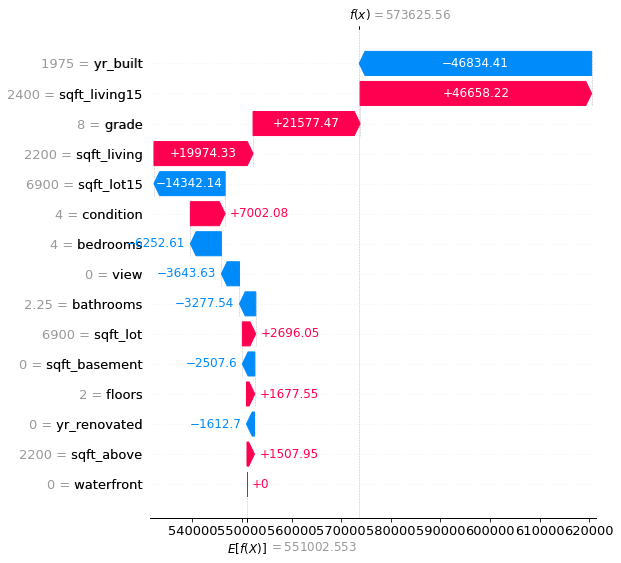

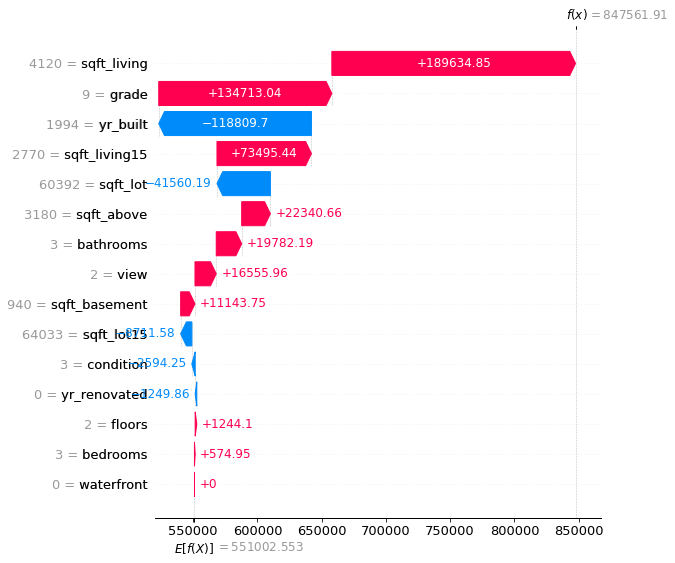

In [4]:
import shap

def label(x):
    return pd.DataFrame(data=x, columns=list(df.columns.values[1:]))
    

def explain(observations, model):
    random.seed(42)
    explainer = shap.Explainer(model.predict, shap.maskers.Independent(label(X_train)))
    shap_values = explainer(label(observations))

    for i in range(len(observations)):
        shap.plots.waterfall(shap_values[i], max_display=15)

explain([obs, obs_], regr)

### Trening modelu regresji liniowej

In [5]:
from sklearn.linear_model import LinearRegression
random.seed(42)
linregr = LinearRegression().fit(X_train, y_train)
mean_absolute_error(y_test, linregr.predict(X_test))

140159.8056450653

### Wykres atrybucji cech dla obserwacji $obs$ i modelu regresji liniowej

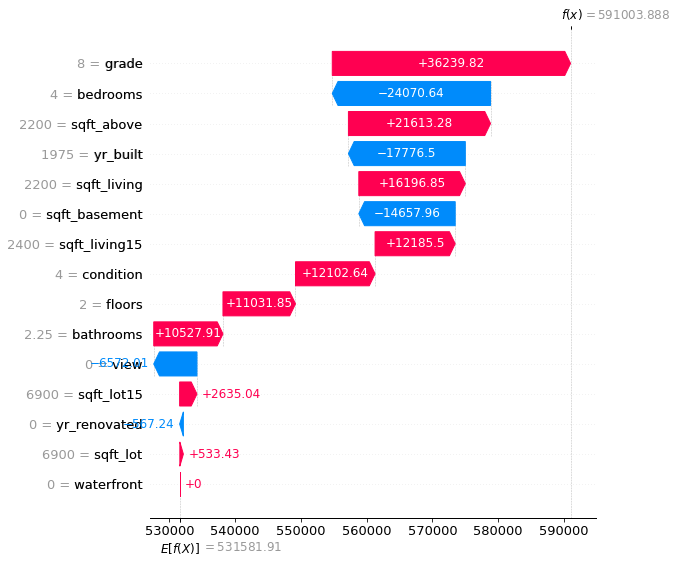

In [13]:
explain([obs], linregr)